## Problem Statement

The fashion industry deals with vast amounts of product images that need to be correctly categorized for tasks such as inventory management, e-commerce search, and product recommendations. Manual labeling of these images is inefficient and prone to errors.

To address this, we aim to develop a neural network-based model using the Fashion MNIST dataset to classify grayscale images of clothing items (e.g., T-shirts, trousers, shoes, and bags) into their respective categories. The goal is to train a deep learning model that not only achieves high accuracy but also generalizes well to unseen data, demonstrating the effectiveness of neural networks in solving real-world image classification problems.

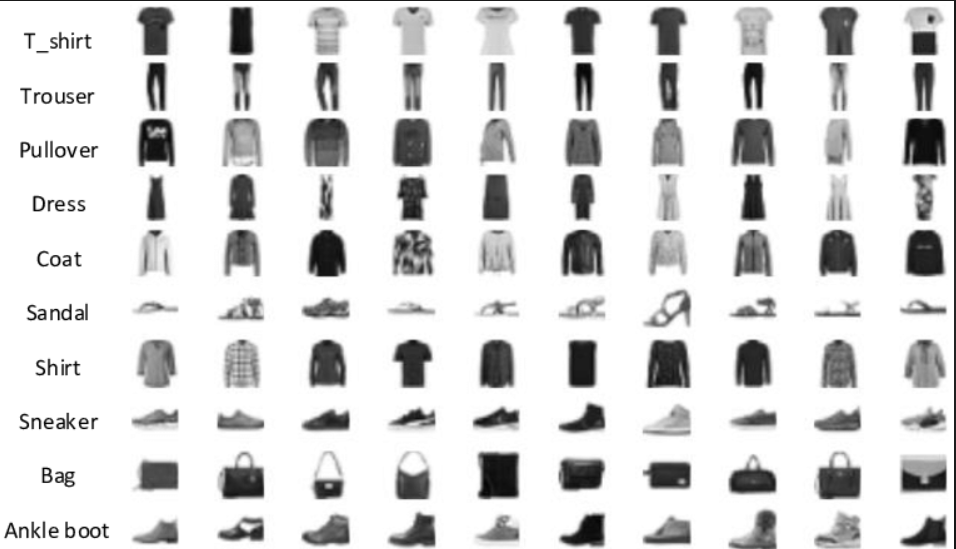

# classes

0-      T-shirt/top
1-      Trouser
2-      Pullover
3-      Dress
4-      Coat
5-      Sandal
6-      Shirt
7-      Sneaker
8-      Bag
9-      Ankle boot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
print(f'train_images_shape {train_images.shape}')
print(f'test_images_shape {test_images.shape}')

train_images_shape (60000, 28, 28)
test_images_shape (10000, 28, 28)


In [ ]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
train_labels[0]

np.uint8(9)

In [ ]:
classes[train_labels[0]]

'Ankle boot'

In [ ]:
# lets plot some sample for visulize
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index],cmap='gray')
  plt.xlabel(classes[y[index]])
  plt.show()

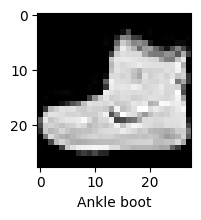

In [ ]:
plot_sample(train_images,train_labels,0)

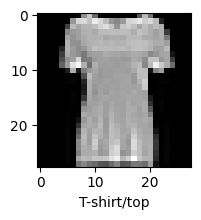

In [ ]:
plot_sample(train_images,train_labels,10)

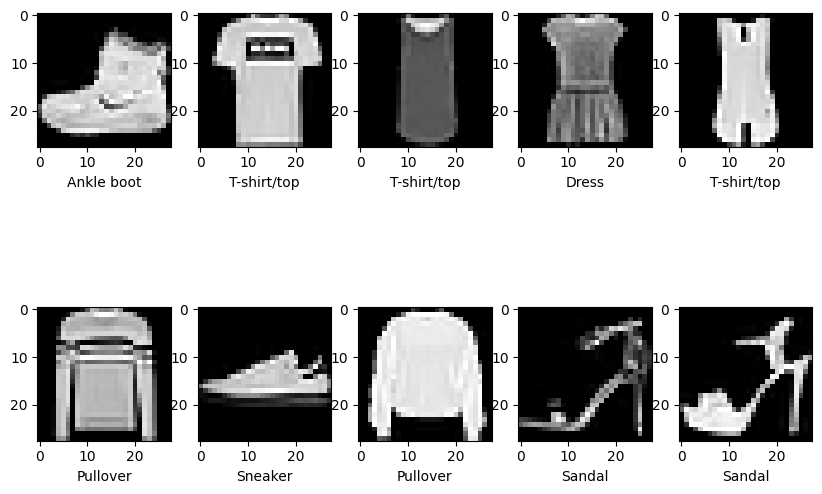

In [ ]:
# visulise the first 10 train images.....
plt.figure(figsize=(10,7))
graph=1
for i in range(10):
  plt.subplot(2,5,graph)
  plt.imshow(train_images[i],cmap='gray')
  plt.xlabel(classes[train_labels[i]])
  graph+=1
plt.show()

In [ ]:
# normalising the pixels..

In [ ]:
train_images=train_images.astype('float')/255
test_images=test_images.astype('float')/255

In [ ]:
train_images=train_images.reshape((-1,28,28,1))
test_images=test_images.reshape((-1,28,28,1))

In [ ]:
# encode the category
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
# lets first later of model data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)])


In [ ]:
def create_cnn_model():
  model=models.Sequential()

  model.add(layers.Input(shape=(28,28,1)))

  #layer 1
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2,2)))

  #layer 2
  model.add(layers.Conv2D(32,(3,3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2,2)))

  #layer 3
  model.add(layers.Conv2D(16,(3,3),activation='relu'))
  model.add(layers.BatchNormalization())

  model.add(layers.Flatten())

  # Dense layer
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10,activation='softmax'))


  model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=create_cnn_model()

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 3, 3, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,026 (171.98 KB)

 Trainable params: 43,802 (171.10 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# defined callbacks for smooth training
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
lr_decay=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3)

In [ ]:
history=model.fit(train_images,train_labels,epochs=50,validation_split=0.2,callbacks=[early_stopping,lr_decay],batch_size=32)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6661 - loss: 0.9680 - val_accuracy: 0.8438 - val_loss: 0.4311 - learning_rate: 0.0100
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8329 - loss: 0.4713 - val_accuracy: 0.8618 - val_loss: 0.3768 - learning_rate: 0.0100
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8586 - loss: 0.4029 - val_accuracy: 0.8703 - val_loss: 0.3449 - learning_rate: 0.0100
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8716 - loss: 0.3625 - val_accuracy: 0.8840 - val_loss: 0.3184 - learning_rate: 0.0100
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8807 - loss: 0.3418 - val_accuracy: 0.8737 - val_loss: 0.3406 - learning_rate: 0.0100
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8812 - loss: 0.3344 - val_accuracy: 0.8726 - val_loss: 0.3440 - learning_rate: 0.0100
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8908 -

In [ ]:
# lets check the model performance by graphs....

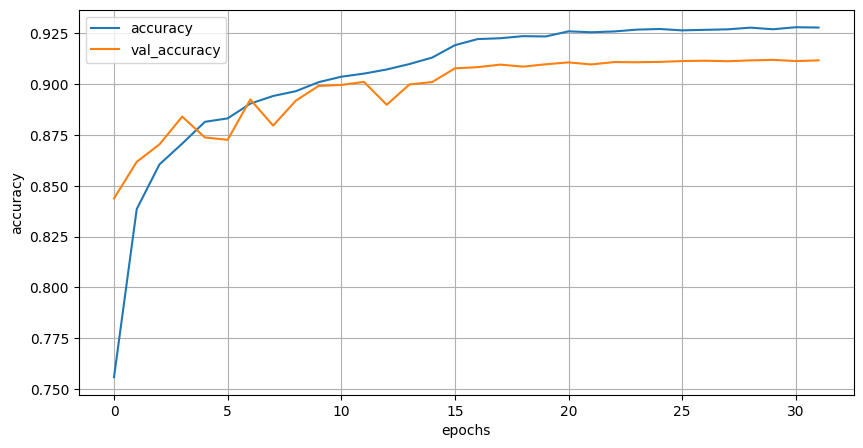

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

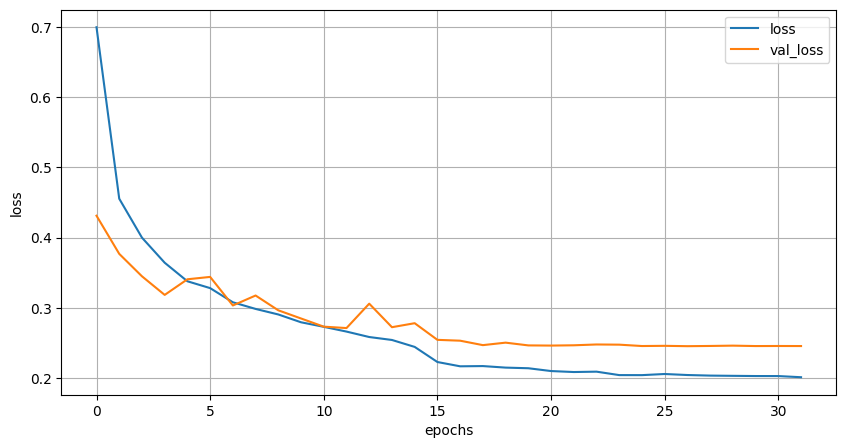

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

#### Over the epochs our accuracy has increased and loss has decreased it means our model is performing good.

In [ ]:
test_loss, test_accuracy=model.evaluate(test_images,test_labels) # checked the model performance on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9019 - loss: 0.2765


In [ ]:
model.save('fashion_mnist_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model=load_model('fashion_mnist_model.keras')

In [ ]:
# predict for first 7 classes
test_1=[np.argmax(element) for element in test_labels[:7]]
test_1

[np.int64(9),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(6),
 np.int64(1),
 np.int64(4)]

In [ ]:
y_pred=loaded_model.predict(test_images[:7])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


In [ ]:
y_pred_7=[np.argmax(element) for element in y_pred]
y_pred_7[:7]

[np.int64(9),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(6),
 np.int64(1),
 np.int64(4)]

In [ ]:
# we can see our model is predicting good....

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


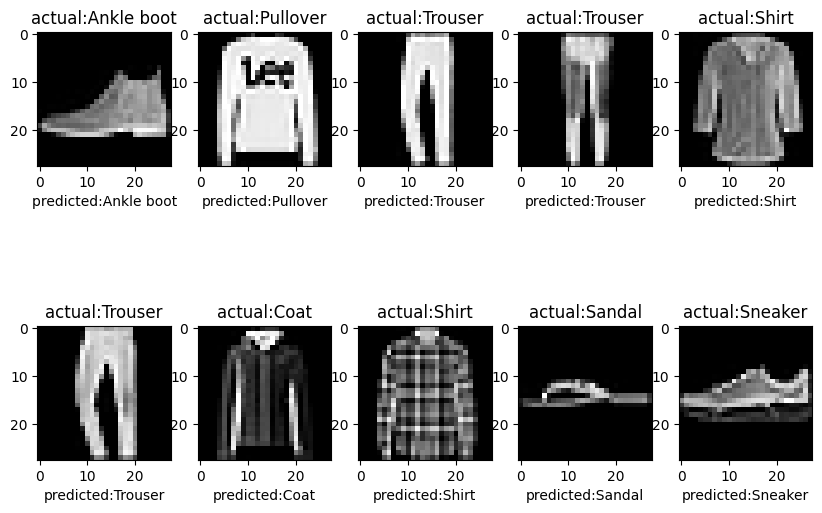

In [ ]:
# Visulising how our model is performing on test data
plt.figure(figsize=(10,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_images[i],cmap='gray')
  y_pred=loaded_model.predict(test_images[i].reshape(1,28,28,1))
  pred_class=np.argmax(y_pred)
  class_=classes[pred_class]
  plt.xlabel(f"predicted:{class_}")
  plt.title(f"actual:{classes[np.argmax(test_labels[i])]}")
plt.show()

In [ ]:
# Our model is predicting all the classes correctly.....

In [ ]:
# lets check the classification report for different classes once
from sklearn.metrics import *
y_pred=loaded_model.predict(test_images)
pred_labels=[np.argmax(element) for element in y_pred]
test_labels=[np.argmax(element) for element in test_labels]

print(f"Classification Report \n : {classification_report(test_labels,pred_labels)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report 
 :               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.87      0.86      1000
           3       0.89      0.91      0.90      1000
           4       0.85      0.86      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.71      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

